# HOTEL BOOKING

# Data Description:

1. hotel : Hotel(Resort Hotel or City Hotel)

2. is_canceled : Value indicating if the booking was canceled (1) or not (0)

3. lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

4. arrival_date_year : Year of arrival date

5. arrival_date_month : Month of arrival date

6. arrival_date_week_number : Week number of year for arrival date

7. arrival_date_day_of_month : Day of arrival date

8. stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

9. stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

10. adults : Number of adults

11. children : Number of children

12. babies : Number of babies

13. meal : Type of meal booked. Categories are presented in standard hospitality meal packages:

14. country : Country of origin.`

15. market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16. distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

17. is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

18. previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

19. previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

20. reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21. assigned_room_type : Code for the type of room assigned to the booking.

22. booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

23. deposit_type : Indication on if the customer made a deposit to guarantee the booking.

24. agent : ID of the travel agency that made the booking

25. company : ID of the company/entity that made the booking or responsible for paying the booking.

26. days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

27. customer_type : Type of booking, assuming one of four categories

28. adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

29. required_car_parking_spaces : Number of car parking spaces required by the customer

30. total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)

31. reservation_status : Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer
Check-Out – customer has checked in but already departed
No-Show – customer did not check-in and did inform the hotel of the reason why

reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Hotel Bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.duplicated().sum()

31994

So we have 31994 duplicate rows in our data. So we will drop the duplicate rows from our data

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(87396, 32)

In [10]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


So we Have Null values in columns- Company, agent, Country,children.

In [11]:
df['country'].nunique()

177

for company and agent I will fill the Missing values with 0
for country I will fill Missing values with boject 'Others'. ( assuming while collecting data country was not found so user selected the 'Others' option.)
AS the count of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.

In [12]:
df['country'].fillna('others',inplace=True)

In [13]:
df['country'].isnull().sum()

0

In [14]:
df['children'].fillna(0,inplace=True)

In [15]:
df['children'].isnull().sum()

0

In [16]:
df['agent'].fillna(0,inplace=True)

In [17]:
 df['agent'].isnull().sum()

0

In [18]:
df['company'].fillna(0,inplace=True)

In [19]:
df['company'].isnull().sum()

0

In [20]:
# lets add some new columns

df['total_people'] = df['adults'] + df['babies'] + df['children']   
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [21]:
# Checking the final rows and columns
df.shape

(87396, 34)

# EDA (Exploratory Data Analysis)

# Univariate Analysis

# Which type of hotel is mostly prefered by the guests?

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

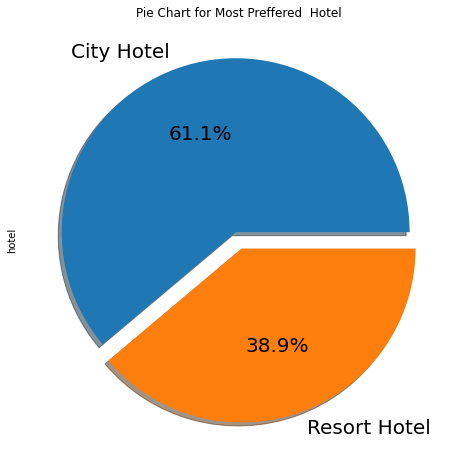

In [22]:
df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel')

City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.

In [23]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

# What is the pecentage of cancellation?

Text(0.5, 1.0, 'Cancellation and non Cancellation')

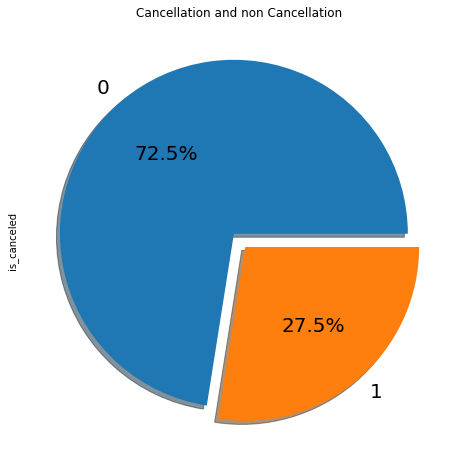

In [25]:
df['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

Observation :
1. 0 =  not cancelled.
2. 1 = cancelled.

# What is the Percentage of repeated guests?

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

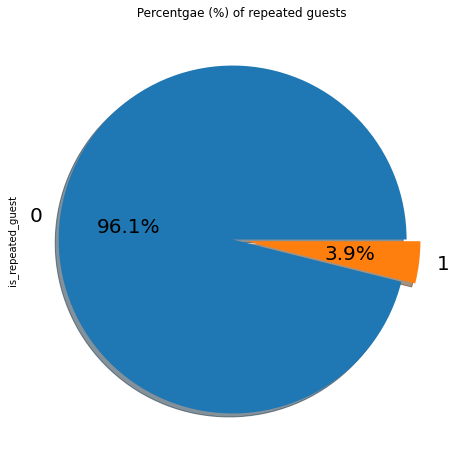

In [26]:
df['is_repeated_guest'].value_counts().plot.pie(explode=(0.04,0.04),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests")

Observation:
Repeated guests are very few which only 3.9 %.
In order to retained the guests management should take feedbacks from guests and try to imporve the services.

# What is the percentage distribution of "Customer Type"?

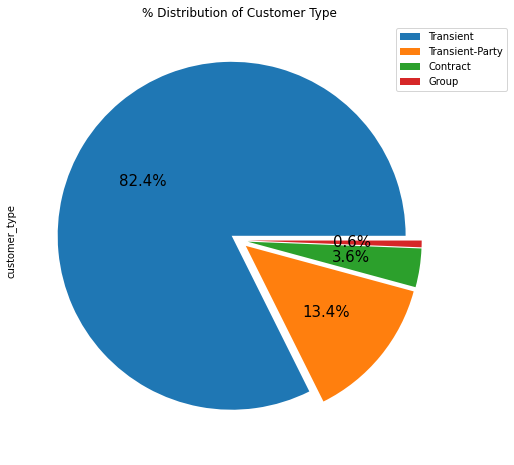

In [27]:
df['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=False,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None)


labels=df['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

1. Contract: when the booking has an allotment or other type of contract associated to it.

2. Group: when the booking is associated to a group.

3. Transient: when the booking is not part of a group or contract, and is not associated to other transient booking.

4. Transient-party: when the booking is transient, but is associated to at least other transient booking.

Observation:
Transient customer type is more whcih is 82.4 %. percentage of Booking associated by the Group is vey low.

# What is the percentage distribution of required_car_parking_spaces?

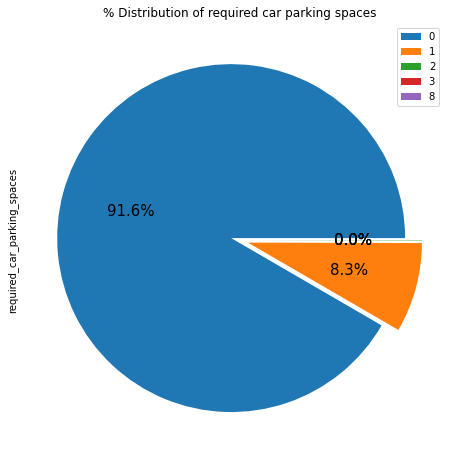

In [28]:
df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=df['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

Text(0.5, 1.0, '% Distribution of required car parking spaces')

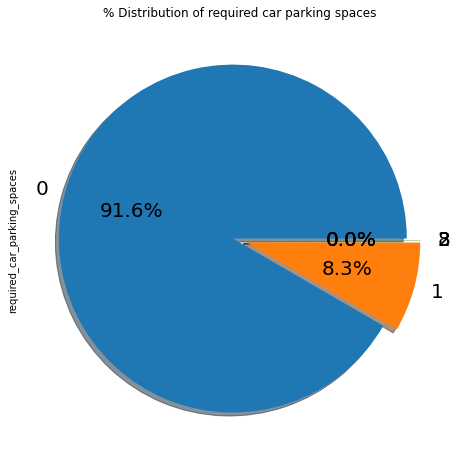

In [29]:
df['required_car_parking_spaces'].value_counts().plot.pie(explode=(0.04,0.04,0.04,0.04,0.04),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title("% Distribution of required car parking spaces")

# Which is the most preferred room type by the customers? 

<AxesSubplot:xlabel='assigned_room_type', ylabel='count'>

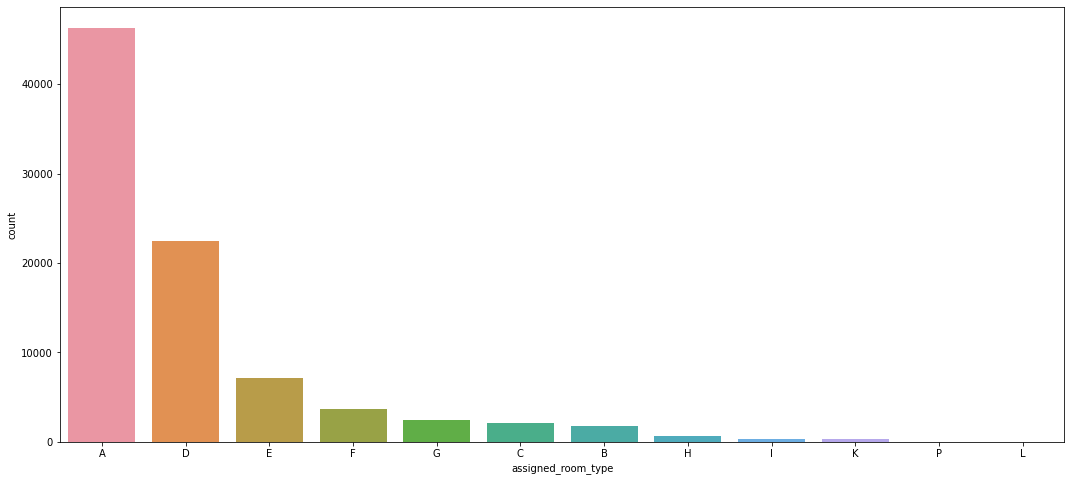

In [30]:
plt.figure(figsize=(18,8))
sns.countplot(x=df['assigned_room_type'],order=df['assigned_room_type'].value_counts().index)

Observation:
So the most preferred Room type is "A".

In [36]:
df['distribution_channel'].value_counts()

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

# Average Price for a Room per Night

Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot. Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR.

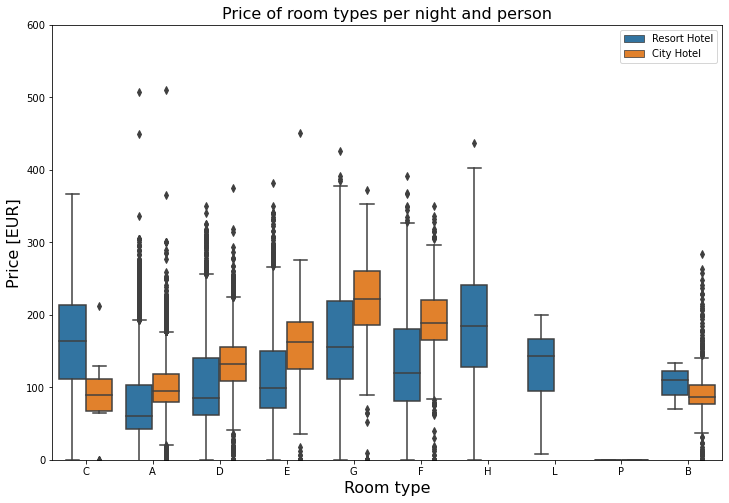

In [69]:
# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr",
            hue="hotel",
            data=df)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 600)
plt.show()

This figure shows the average price per room, depending on its type and the standard deviation. Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.


# Which type of hotel has heighest ADR

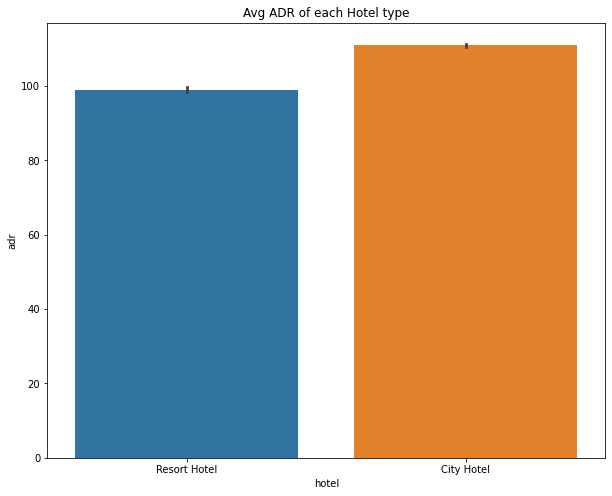

In [38]:
plt.figure(figsize=(10,8))
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")
sns.barplot(x=df['hotel'],y=df['adr'])
plt.show()

Observation:
City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.

# NUMBER OF REPETATION OF GUESTS

Text(0.5, 1.0, 'HOTEL WISE REPETATION OF GUEST')

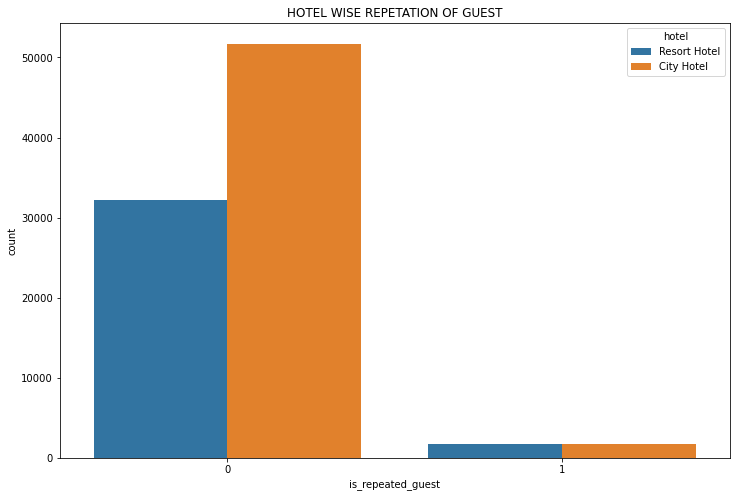

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['is_repeated_guest'],hue=df['hotel'])
plt.title("HOTEL WISE REPETATION OF GUEST")

obeservation: mostly guest are not repeated in both the hotel type.

In [58]:
df['agent'].

<bound method IndexOpsMixin.nunique of 0           0.0
1           0.0
2           0.0
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 87396, dtype: float64>

# BOOKING THROUGH DIFFERENT DUSTRIBUTION CHANNEL

<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

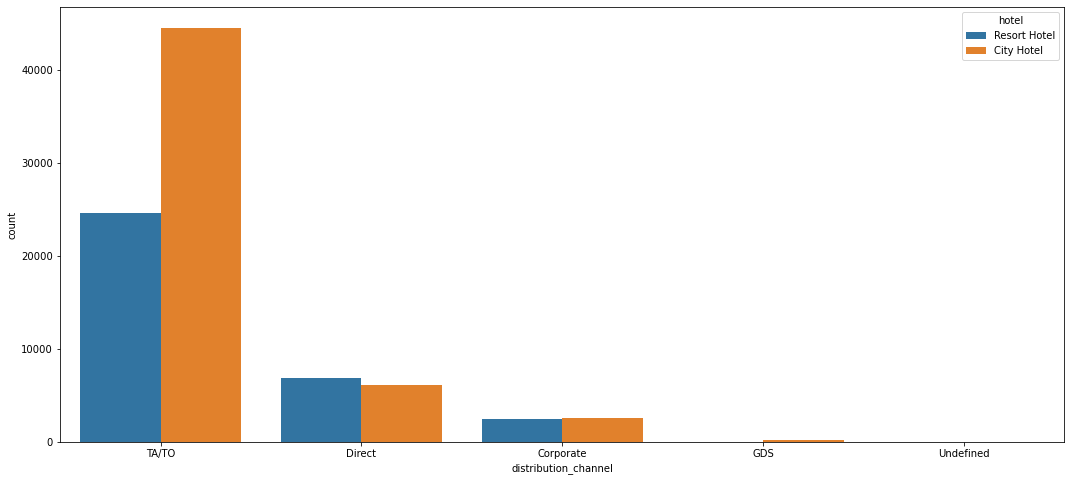

In [74]:
plt.figure(figsize=(18,8))
sns.countplot(x=df['distribution_channel'],hue=df['hotel'],order=df['distribution_channel'].value_counts().index)

Observation
1. Through TA/TO Booking is higher compared to other distribution channel.

In [43]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_people',
       'total_stay'],
      dtype='object')

In [44]:
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

In [45]:
bookings_by_months_df

,arrival_date_month,Counts
4,January,4693
3,February,6098
7,March,7513
0,April,7908
8,May,8355
6,June,7765
5,July,10057
1,August,11257
11,September,6690
10,October,6934


Text(0, 0.5, 'Number of bookings')

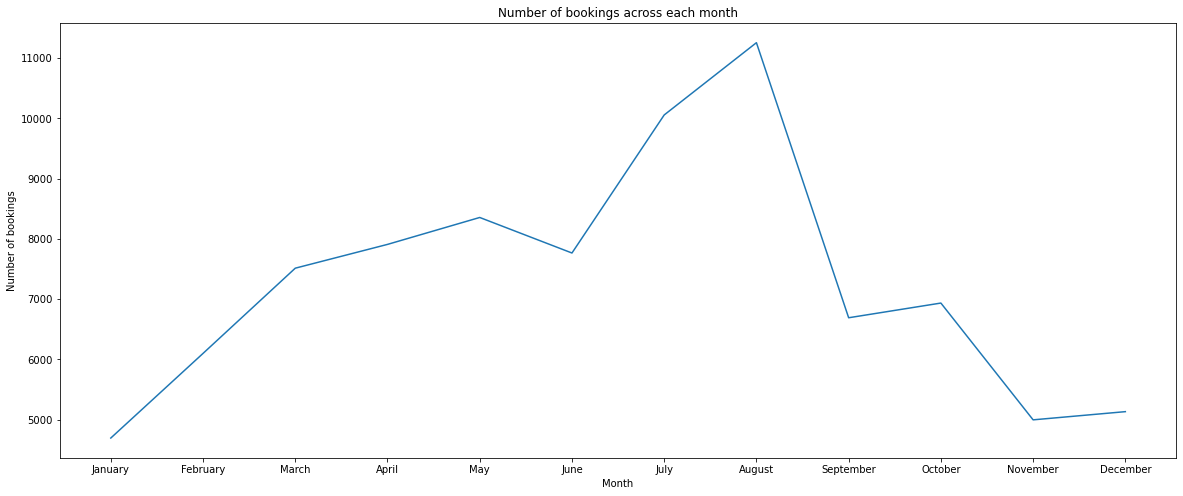

In [46]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

Observation: 
July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.

# ADR ACROSS EACH MONTH

Text(0, 0.5, 'ADR')

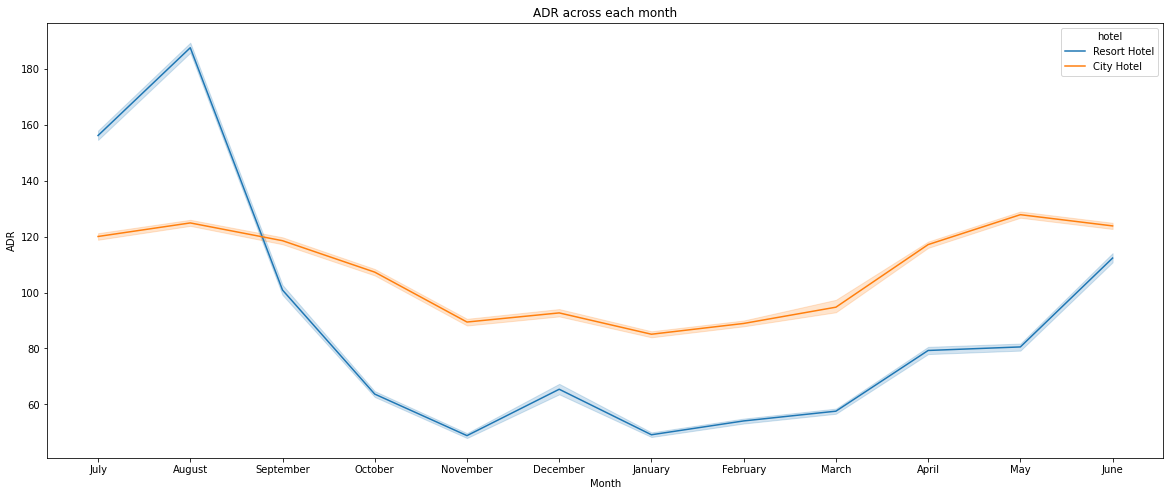

In [47]:
# set plot size and plot the line
plt.figure(figsize=(20,8))
sns.lineplot(x=df['arrival_date_month'],y=df['adr'],hue=df['hotel'])

# set lables
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

Observation
1. For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

2. The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

# Which year had the highest bookings?

Text(0.5, 1.0, 'Year Wise bookings')

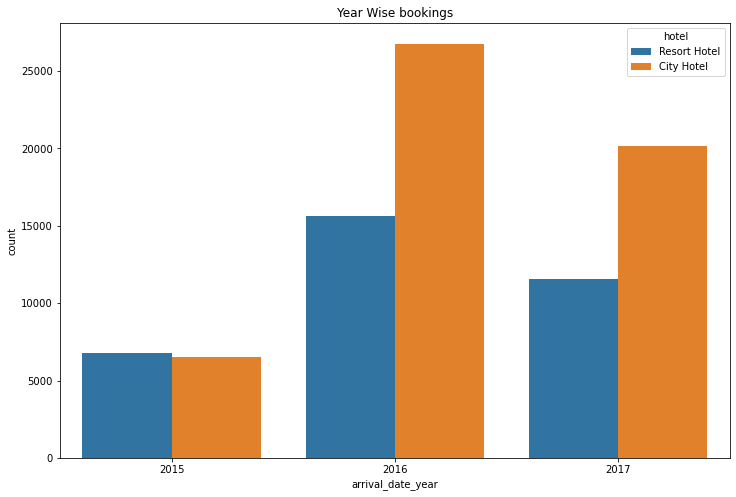

In [48]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df['arrival_date_year'],hue=df['hotel'])
plt.title("Year Wise bookings")

Observation:
1. 2016 had the higest bookings in resort hotel and city hotel and 2017 das second heighest booking
2. overall City hotels had the most of the bookings.

# Which distribution channel contributed more to adr in order to increase the the income.?

Text(0.5, 1.0, 'ADR across Distribution channel')

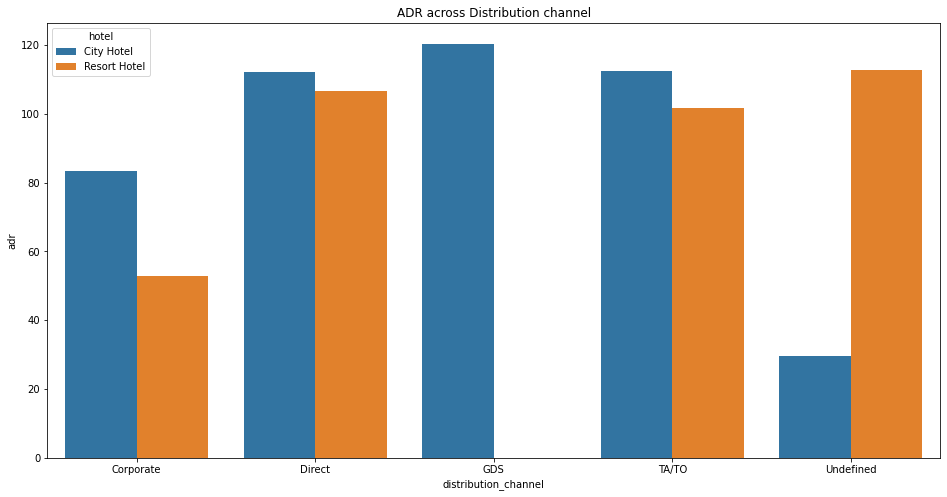

In [49]:
# group by distribution channel and hotel
distribution_channel_df=df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')

1. Corporate- These are corporate hotel booing companies which makes bookings possible.
2. GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
3. Direct- means that bookings are directly made with the respective hotels
4. TA/TO- means that booings are made through travel agents or travel operators.
5. Undefined- Bookings are undefined. may be customers made their bookings on arrival.

Observation
1. From the plot is clear that
2. 'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.
3. GDS has highly contributed in adr in 'City Hotel' type.
4. GDS needs to increase Resort Hotel bookings.

# Relationship between ADR and total stay.

Text(0.5, 1.0, 'Relationship between adr and total stay')

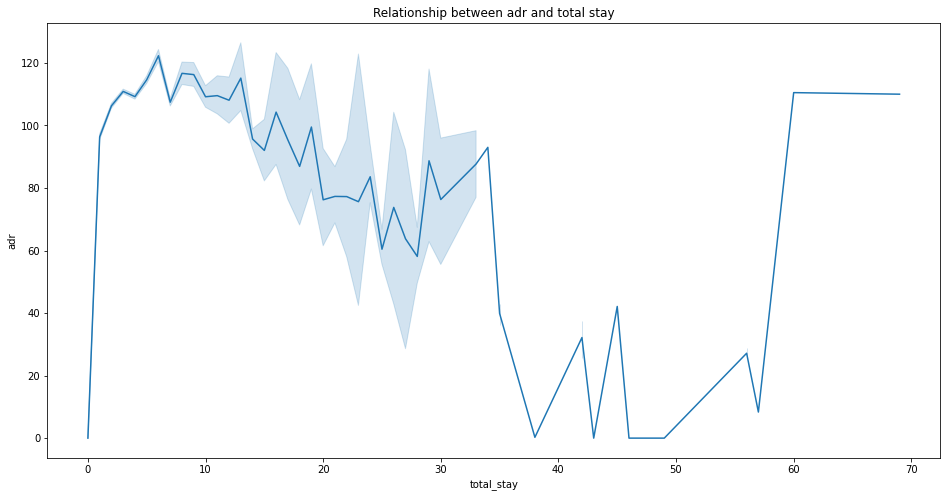

In [50]:
#plot line chart
plt.figure(figsize=(16,8))
sns.lineplot(x='total_stay',y='adr',data=df)
plt.title('Relationship between adr and total stay')

# ADR relationship with total number of people

Text(0.5, 1.0, 'ADR v/s Total Number of people')

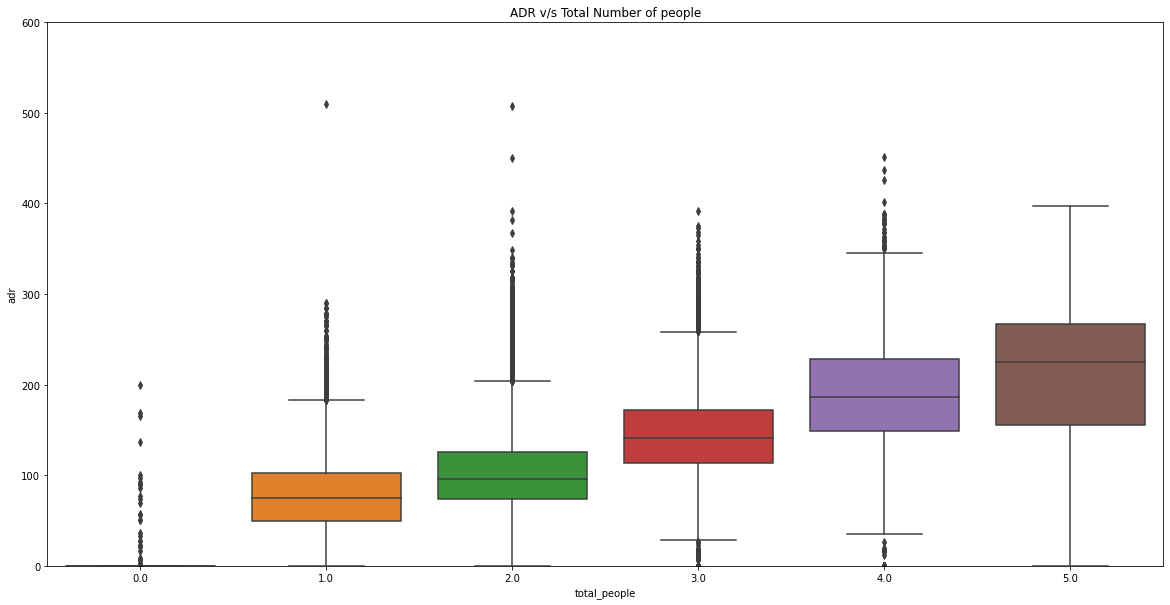

In [73]:
plt.figure(figsize=(20,10))
df2=df[df['total_people'] < 6]
plt.ylim(0, 600)

sns.boxplot(x=df2['total_people'],y=df2['adr'])
plt.title('ADR v/s Total Number of people')

As the total number of people increases adr also increases.
Thus adr and total people are directly proportional to each other.

# RELATIONSHIP BETWEEN ADR AND TOTAL STAY

Text(0.5, 1.0, 'Relationship between  adr and total stay')

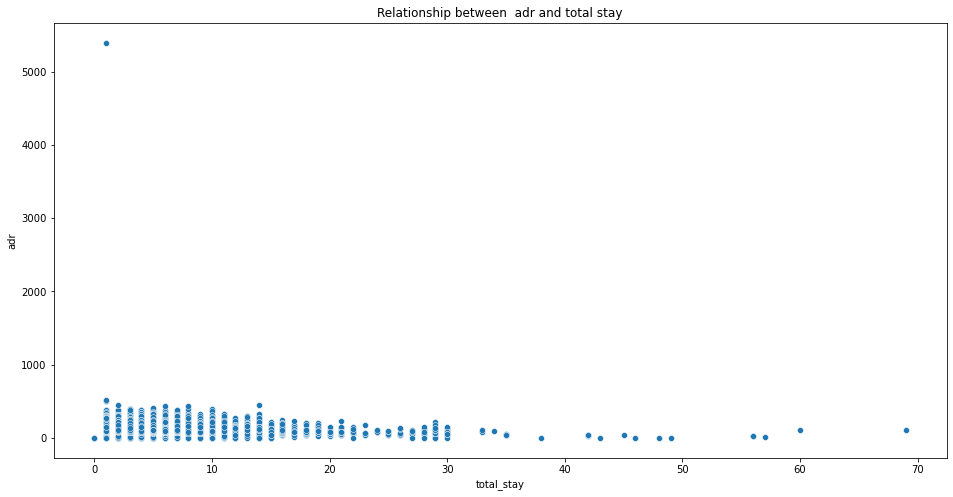

In [53]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df['total_stay'],y=df['adr'])
plt.title('Relationship between  adr and total stay')

From above scatter we can say that as the stay increases adr is decreasing. Thus for longer stays customer can get good adr. i.e for longer stay, the better deal for customer can be finalised.

In [54]:
df['adr'].max()

5400.0

<function matplotlib.pyplot.show(close=None, block=None)>

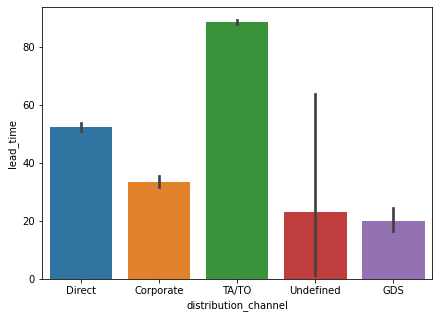

In [55]:
plt.figure(figsize = (7,5))
sns.barplot(x = df['distribution_channel'], y = df['lead_time'])
plt.show

when People books hotels through TA/TO  then there is more Lead Time compared to other booking

# Which hotel has longer waiting time?

Text(0.5, 1.0, 'Waiting time for each hotel type')

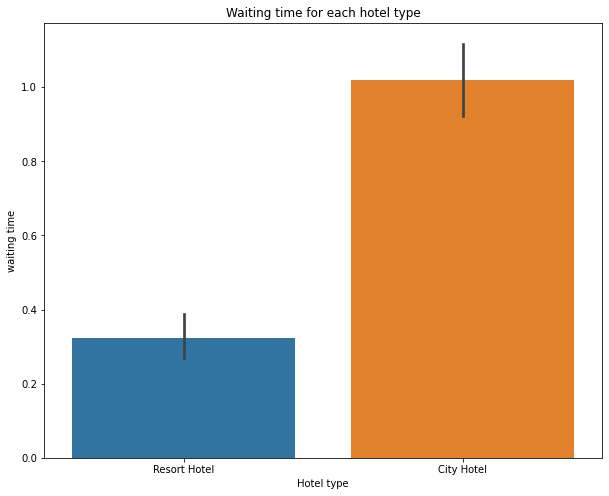

In [56]:
plt.figure(figsize=(10,8))

# plot barchart
sns.barplot(x=df['hotel'],y=df['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")

Observation:
So the City Hotels has longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels